In [88]:
# Setting up the environment.
import numpy as np
import pandas as pd
from scipy import stats

In [99]:
# Load the data from Covidtracking
us_df = pd.read_csv('https://covidtracking.com/api/us/daily.csv', index_col=0)

In [100]:
us_df.head(5)

,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,...,death,hospitalized,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,,,,,,,,,,
20200401,56,210770,939190,59687,16223.0,31142.0,3837.0,4270.0,71.0,676.0,...,4700,31142.0,1209647,1149960,1149960,954.0,4482.0,74989.0,26000.0,100989.0
20200331,56,184770,864201,59529,14236.0,26660.0,3402.0,3644.0,69.0,507.0,...,3746,26660.0,1108500,1048971,1048971,807.0,4357.0,79877.0,24240.0,104117.0
20200330,56,160530,784324,65382,12147.0,22303.0,2982.0,3177.0,259.0,644.0,...,2939,22303.0,1010236,944854,944854,511.0,2573.0,92034.0,21469.0,113503.0
20200329,56,139061,692290,65549,9922.0,19730.0,2456.0,2642.0,59.0,440.0,...,2428,19730.0,896900,831351,831351,463.0,3001.0,74820.0,20827.0,95647.0
20200328,56,118234,617470,65712,8725.0,16729.0,2174.0,2314.0,54.0,390.0,...,1965,16729.0,801416,735704,735704,435.0,3011.0,90250.0,18821.0,109071.0


In [101]:
us_df = us_df.reset_index()
us_df.date = pd.to_datetime(us_df.date, format="%Y%m%d")
us_df = us_df.set_index('date').sort_index()
us_df = us_df.reset_index()
us_df = us_df[['date','positive', 'negative', 'pending', 'death', 'total']]

In [102]:
us_df.tail(5)

,date,positive,negative,pending,death,total
24,2020-03-28,118234,617470,65712,1965,801416
25,2020-03-29,139061,692290,65549,2428,896900
26,2020-03-30,160530,784324,65382,2939,1010236
27,2020-03-31,184770,864201,59529,3746,1108500
28,2020-04-01,210770,939190,59687,4700,1209647


In [77]:
us_df['date'].dtypes

period[D]

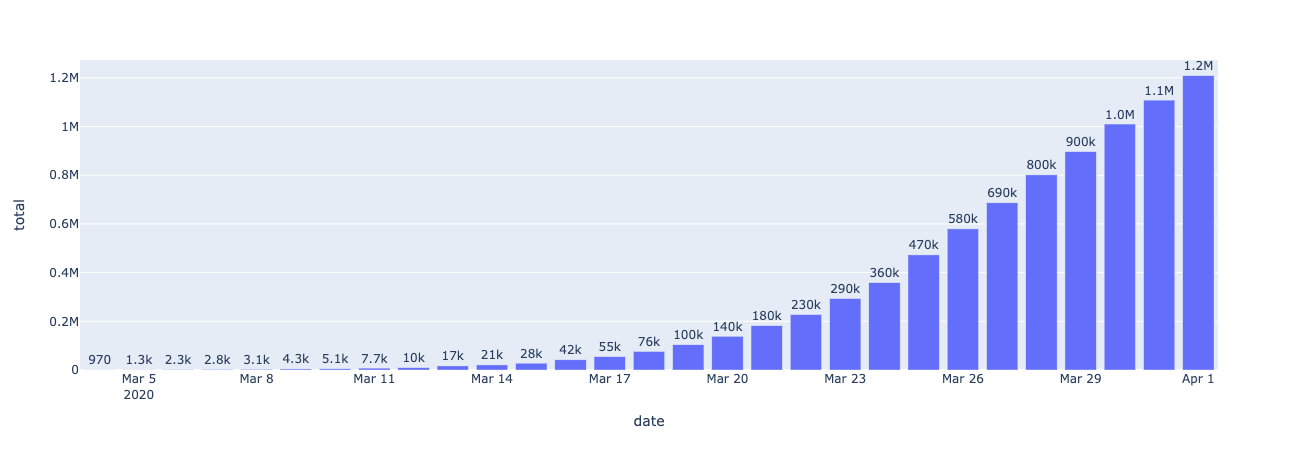

In [103]:
import plotly.express as px
fig = px.bar(us_df, x='date', y='total', text='total')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

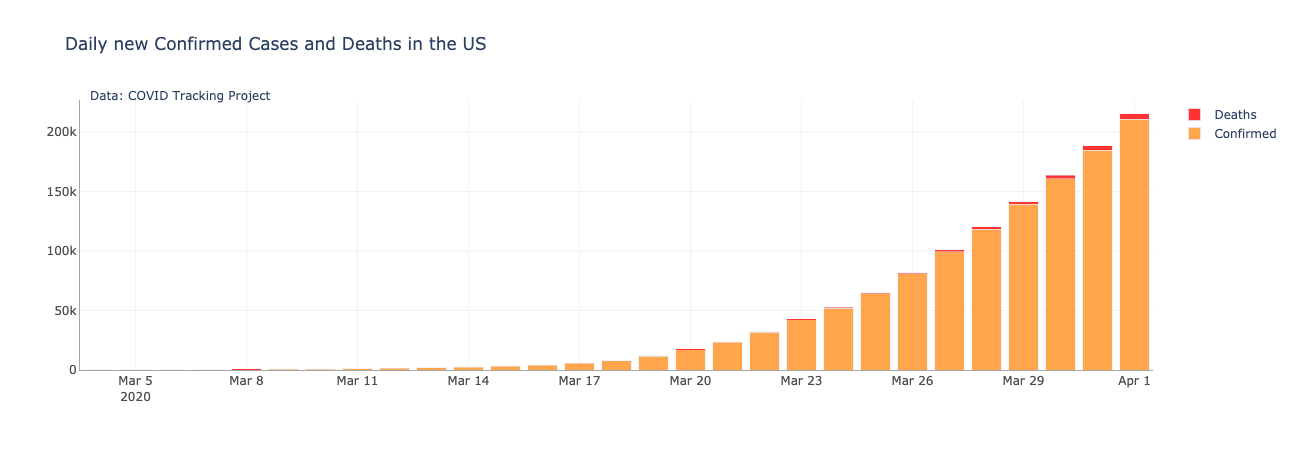

In [242]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Bar(x = us_df['date'], y = us_df['positive'],
              #hovertext='Positive cases',
              name='Confirmed ',
              textposition='outside',
              hoverlabel=dict(bgcolor='#ffa64d', bordercolor='white',
                font=dict(family='Arial', size=22, color='white')
                             ),
              marker_color='#ffa64d'
                     
                     
                    )
             )

fig.add_trace(go.Bar(x = us_df['date'], y = us_df['death'],
              #hovertext='Deaths',
              name='Deaths ',
              #opacity=.5,
              textposition='outside',
              hoverlabel=dict(bgcolor='#ff3333', bordercolor='white',
                font=dict(family='Arial', size=22, color='white')
                             ),
              marker_color='#ff3333'     
                     
                    )
             )

fig.update_layout(barmode='stack', title_text='Daily new Confirmed Cases and Deaths in the US',
                 paper_bgcolor='rgba(0,0,0,0)', 
                 plot_bgcolor='rgba(0,0,0,0)',
                 uniformtext_minsize=8, uniformtext_mode='show',
                 annotations=[
                    dict(
                        x=0.007,
                        y=1.05,
                        text="Data: COVID Tracking Project",
                        xref="paper",
                        yref="paper",
                        showarrow=False
                   )]
                 )
                 
                     
fig.update_xaxes(showline=True, linewidth=1, linecolor='#a6a6a6', color='#4d4d4d',
                showgrid=True, gridwidth=1, gridcolor='#f2f2f2'
                )
fig.update_yaxes(showline=True, linewidth=1, linecolor='#a6a6a6', color='#4d4d4d',
                 showgrid=True, gridwidth=1, gridcolor='#f2f2f2'
                )

fig.update_traces(textposition='outside')


fig.show()

import plotly.io as pio
pio.write_html(fig, file='Index.html', auto_open=True)